#📋 [강의 노트] 센서 데이터 전처리 및 정제

1. 개요 및 동작 설명

- 현장의 센서는 통신 오류나 환경적 요인으로 인해 종종 불완전한 데이터를 전송합니다.

- 이 코드는 신뢰할 수 있는 디지털 트윈 모델링을 위해 다음과 같은 3단계 정제 과정을 거칩니다.

* [1단계] 결측치 보간 (Interpolation): 데이터가 비어 있는 구간을 앞뒤 데이터를 기반으로 부드럽게 채워 넣습니다.

* [2단계] 노이즈 필터링 (Noise Filtering): 신호에 섞인 자잘한 잡음(튀는 값)을 제거하기 위해 중앙값 필터(Median Filter)를 적용합니다. 이는 신호의 급격한 변동(Edge)은 보존하면서 노이즈만 제거하는 데 효과적입니다.

* [3단계] 이상치 제거 (Outlier Removal): 통계적 방법인 Z-Score를 사용하여, 정상 범위(평균에서 표준편차의 3배 이내)를 벗어난 비정상적인 데이터를 삭제합니다.

In [4]:
import pandas as pd
from scipy.signal import medfilt

# ---------------------------------------------------------
# 1. 원본 센서 데이터 로드 (Load Raw Sensor Data)
# ---------------------------------------------------------
# CSV 파일에서 센서 로그 데이터를 불러옵니다.
# 실제 현장에서는 DB 접속이나 API 호출로 대체될 수 있습니다.
df = pd.read_csv('./sample_data/sensor_log.csv')

# ---------------------------------------------------------
# 2. 결측치 채우기 (Fill Missing Values)
# ---------------------------------------------------------
# 통신 누락 등으로 인해 비어있는 값(NaN)을 선형 보간법(Linear Interpolation)으로 채웁니다.
# 예: 10과 20 사이에 빈 값이 있다면 15로 추정하여 채워 넣습니다.
df['value'] = df['value'].interpolate(method='linear')

# ---------------------------------------------------------
# 3. 노이즈 필터링 (Filter Noise)
# ---------------------------------------------------------
# 중앙값 필터(Median Filter)를 사용하여 신호를 부드럽게 만듭니다.
# kernel_size=5는 5개의 연속된 데이터 창(Window)에서 중앙값을 취한다는 의미입니다.
# 이는 '튀는 값(Spike)'을 제거하는 데 탁월합니다.
df['clean'] = medfilt(df['value'], kernel_size=5)

# ---------------------------------------------------------
# 4. 이상치 제거 (Remove Outliers)
# ---------------------------------------------------------
# 정제된 데이터('clean')의 평균(mean)과 표준편차(std)를 계산합니다.
mean = df['clean'].mean()
std = df['clean'].std()

# Z-Score 방식을 적용하여 평균에서 ±3 표준편차 범위를 벗어나는 데이터를 필터링합니다.
# 통계적으로 정규분포를 가정할 때, 약 99.7%의 데이터가 이 범위 안에 들어와야 합니다.
# 이 범위를 벗어나는 데이터는 센서 고장이나 극단적인 이상 상황으로 간주하여 제외합니다.
df_final = df[abs(df['clean'] - mean) < 3 * std]

# 최종 결과 확인 (필요시 출력)
print(df_final.head())

                     timestamp      value      clean
0  2024-12-25T10:30:00.000000Z  48.996321  48.996321
1  2024-12-25T10:30:00.010000Z  55.842304  55.842304
2  2024-12-25T10:30:00.020000Z  56.249302  55.842304
3  2024-12-25T10:30:00.030000Z  57.182883  56.249302
4  2024-12-25T10:30:00.040000Z  55.415057  56.899686


In [3]:
import pandas as pd

# Load the raw sensor data
df_raw = pd.read_csv('./sample_data/sensor_log.csv')

# Check for missing values in the 'value' column before interpolation
missing_values_count = df_raw['value'].isnull().sum()
print(f"데이터 로드 후 'value' 컬럼의 결측치 개수: {missing_values_count}개")

# Display rows with missing values (if any) for better understanding
if missing_values_count > 0:
    print("\n결측치가 있는 행의 예시:")
    display(df_raw[df_raw['value'].isnull()].head())

데이터 로드 후 'value' 컬럼의 결측치 개수: 6개

결측치가 있는 행의 예시:


timestamp  value
35  2024-12-25T10:30:00.350000Z    NaN
36  2024-12-25T10:30:00.360000Z    NaN
37  2024-12-25T10:30:00.370000Z    NaN
38  2024-12-25T10:30:00.380000Z    NaN
39  2024-12-25T10:30:00.390000Z    NaN

위 결과에서 보시는 것처럼, 'value' 컬럼에 결측치(NaN)가 존재합니다. 이 결측치들은 기존 노트북 코드의 **[1단계] 결측치 보간 (Interpolation)** 단계에서 선형 보간법을 사용하여 채워집니다. 또한, **[2단계] 노이즈 필터링**과 **[3단계] 이상치 제거** 단계를 통해 데이터의 노이즈와 이상치도 처리됩니다. 전체 정제 과정은 `5ufRePU6aur-` 셀에 구현되어 있습니다.

In [5]:
display(df_final)

timestamp      value      clean
0   2024-12-25T10:30:00.000000Z  48.996321  48.996321
1   2024-12-25T10:30:00.010000Z  55.842304  55.842304
2   2024-12-25T10:30:00.020000Z  56.249302  55.842304
3   2024-12-25T10:30:00.030000Z  57.182883  56.249302
4   2024-12-25T10:30:00.040000Z  55.415057  56.899686
..                          ...        ...        ...
95  2024-12-25T10:30:00.950000Z  46.452673  46.672765
96  2024-12-25T10:30:00.960000Z  48.634189  48.110726
97  2024-12-25T10:30:00.970000Z  49.698253  48.634189
98  2024-12-25T10:30:00.980000Z  48.110726  48.634189
99  2024-12-25T10:30:00.990000Z  50.140353  48.110726

[100 rows x 3 columns]

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['clean'].plot(kind='hist', bins=20, title='clean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='value', y='clean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['clean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('clean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['clean'].plot(kind='line', figsize=(8, 4), title='clean')
plt.gca().spines[['top', 'right']].set_visible(False)

2. 구동 결과에 대한 해석

- 이 코드를 실행하고 나면, df_final 변수에는 품질이 확보된 데이터만 남게 됩니다. 각 단계별 결과의 의미는 다음과 같습니다.

- 보간 적용 (interpolate): 끊겨 있던 데이터 그래프가 하나의 이어진 선으로 연결됩니다. 이를 통해 시뮬레이션 시 데이터가 끊겨 모델이 멈추는 것을 방지합니다.

- 필터링 적용 (medfilt): 지글거리는 톱니 모양의 노이즈가 사라지고, 데이터의 추세(Trend)가 명확하게 드러납니다. 디지털 트윈이 너무 민감하게 반응하지 않도록 돕습니다.

- 이상치 제거 결과 (df_final): 기계의 오작동이나 센서 에러로 인해 발생한 터무니없는 값(예: 온도가 갑자기 1000도가 되는 경우)이 데이터셋에서 제외됩니다.

결론적으로: 이 코드는 "가상 공간의 쌍둥이(Digital Twin)가 현실을 오해하지 않도록" 데이터를 깨끗하게 씻어내는 필수적인 준비 운동 과정입니다.

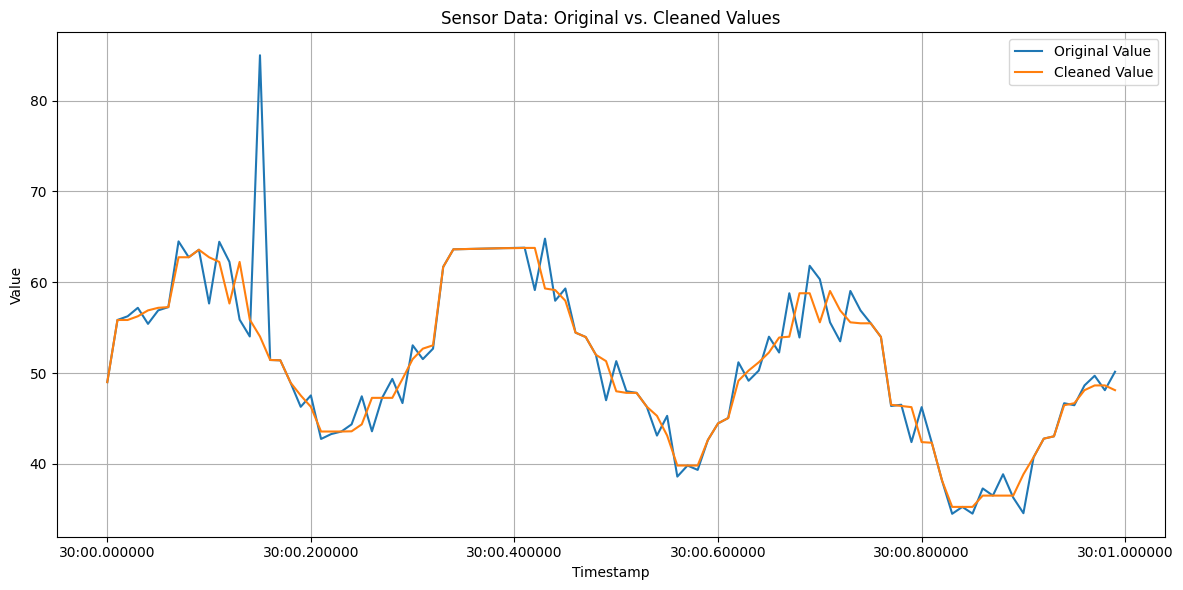

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'timestamp' is in datetime format for proper plotting
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='value', data=df_final, label='Original Value')
sns.lineplot(x='timestamp', y='clean', data=df_final, label='Cleaned Value')

plt.title('Sensor Data: Original vs. Cleaned Values')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()